# 1 Daten laden und erste Darstellung (Selektion, Prüfung)



Die Daten stammen aus dem folgenden Kaggle-Datensatz: https://www.kaggle.com/shree1992/housedata.

Anfangs werden die wichtigsten Klassen geladen, die das Importieren der Daten sowie die Analyse der Daten nach linearer Algebra ermöglichen. Dabei steht das "np" als lineare Algebraklasse von numpy, mit welcher große Arrays gehandhabt werden können. Als Datenverarbeitungsklasse steht "pd", mit welcher Daten verwaltet und analysiert werden können. Zur Datenvisualisierung wird "matplotlib.pyplot" verwendet, hiermit können Tabellen und Diagramme erstellt werden.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df_original = pd.read_csv("../datasets/Immobiliendaten.csv")
df = df_original.copy()
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

(4600, 18)

Der Datensatz besteht aus 4600 Einträgen mit jeweils 18 Attributen. Kein Wert ist dabei "null", also zu jeder Immobilie sind alle Werte mit angegeben.

In [4]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


# 2 Summary, max-min Tabellen

In [5]:
df.describe(percentiles=[.25, .50, .75, .99]).map(lambda x: f"{x:0.2f}")

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00
mean,551962.99,3.40,2.16,2139.35,14852.52,1.51,0.01,0.24,3.45,1827.27,312.08,1970.79,808.61
std,563834.70,0.91,0.78,963.21,35884.44,0.54,0.08,0.78,0.68,862.17,464.14,29.73,979.41
min,0.00,0.00,0.00,370.00,638.00,1.00,0.00,0.00,1.00,370.00,0.00,1900.00,0.00
25%,322875.00,3.00,1.75,1460.00,5000.75,1.00,0.00,0.00,3.00,1190.00,0.00,1951.00,0.00
50%,460943.46,3.00,2.25,1980.00,7683.00,1.50,0.00,0.00,3.00,1590.00,0.00,1976.00,0.00
75%,654962.50,4.00,2.50,2620.00,11001.25,2.00,0.00,0.00,4.00,2300.00,610.00,1997.00,1999.00
99%,2005220.00,6.00,4.50,5180.10,203455.49,3.00,0.00,4.00,5.00,4460.10,1700.20,2014.00,2014.00
max,26590000.00,9.00,8.00,13540.00,1074218.00,3.50,1.00,4.00,5.00,9410.00,4820.00,2014.00,2014.00


**Interpretation der Werte**

In [6]:
print("Renovierung Jahr == 0: " + str(len(df[df["yr_renovated"] == 0])))
print("Preis == 0: " + str(len(df[df["price"] == 0])))
print("Preis > 10.000.000: " + str(len(df[df["price"] > 10000000])))

Renovierung Jahr == 0: 2735
Preis == 0: 49
Preis > 10.000.000: 2


In [7]:
df = df[df["price"] < 5000000]
df = df[df["price"] != 0]

## Immobilienpreis-Verteilung

<Axes: >

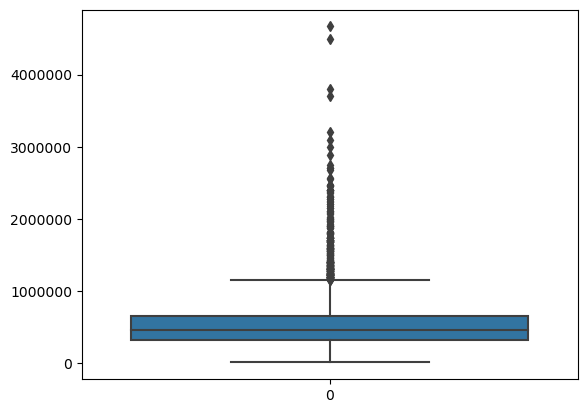

In [8]:
plt.figure(dpi=100)
plt.ticklabel_format(style = 'plain')
sns.boxplot(df["price"])

# 3 Histogramme aller Attribute

Zur Visualisierung werden alle Attribute einmal als Balkendiagramme dargestellt, um einen ersten Eindruck zu erhalten, wie die Verteilung ist.

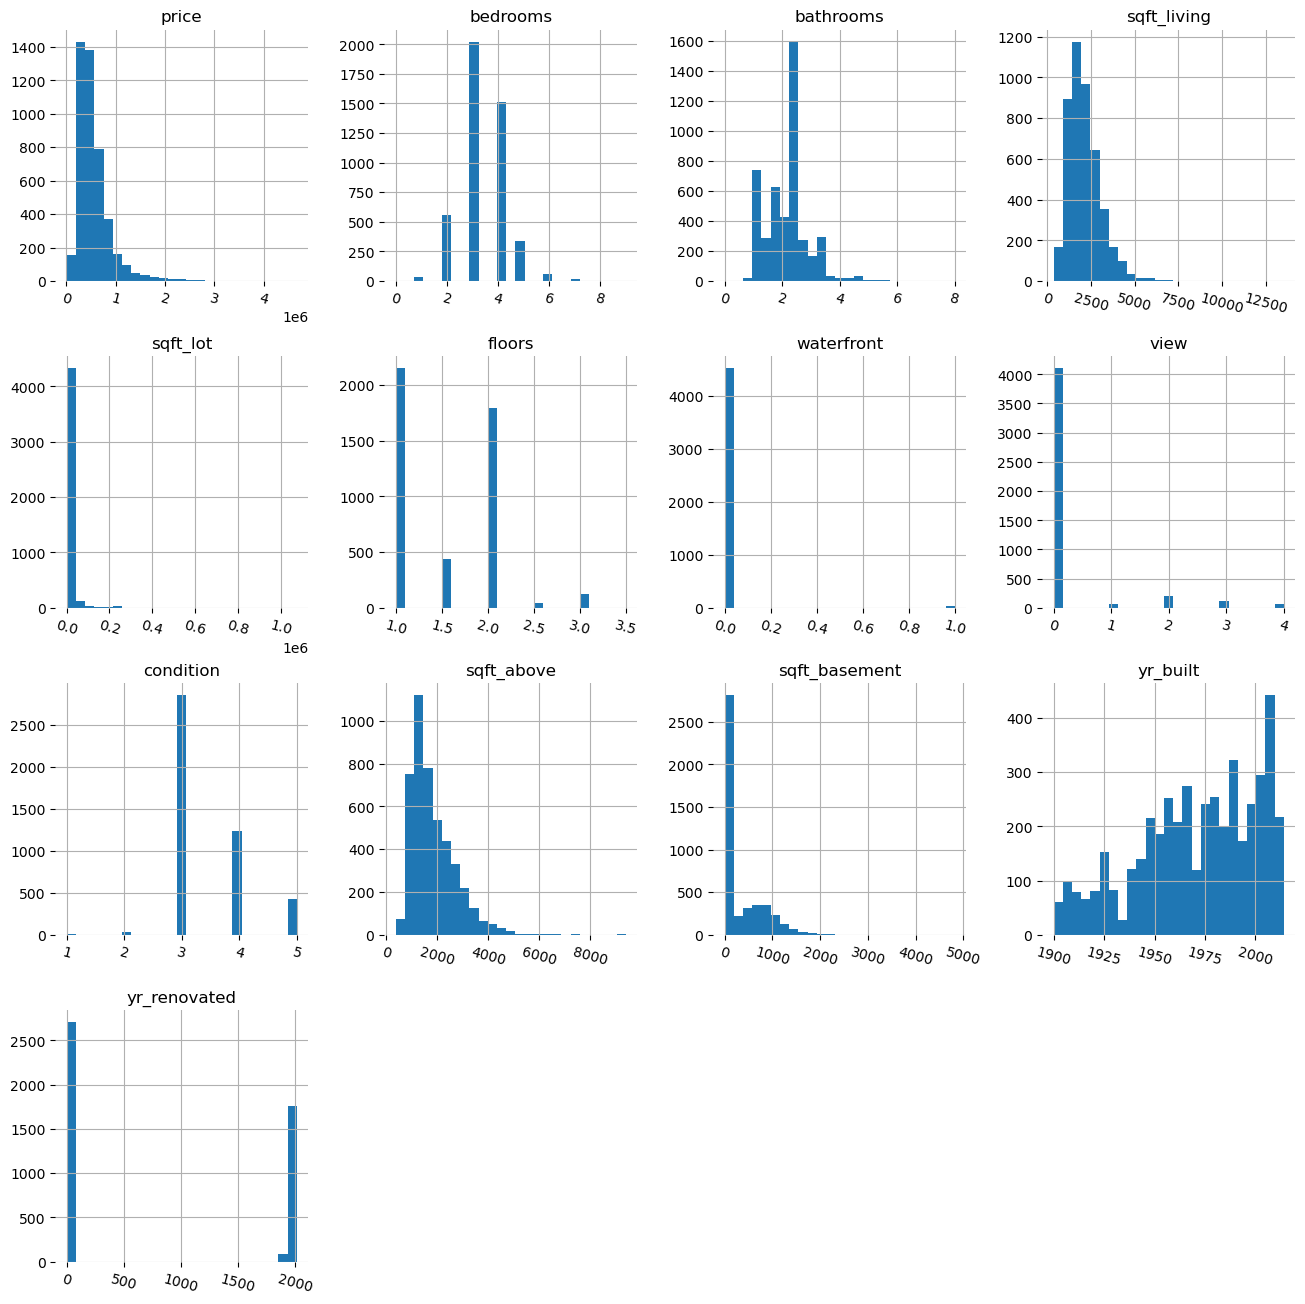

In [9]:
column_list = [col for col in df.columns if col not in ['street', 'city', 'statezip', 'country']]
df1 = df[column_list]
h = df1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

## Outlier detection

In [10]:
def outlier_detection(dataset, x):
    q1, q3 = np.percentile(dataset[x], 25), np.percentile(dataset[x], 75)
    iqr = q3 - q1 # Interquantile Range (IQR = Q3 - Q1)
    cut_off = 2 * iqr
    lower, upper = (q1 - cut_off), (q3 + cut_off)
#     dataset = dataset[dataset[x] <= upper]
    print('Grenzwert für',x,'IQR:', lower, '(Immobilien <', lower,':', len(dataset[dataset[x] < lower]), ')')
    print('Grenzwert für',x,'IQR:', upper, '(Immobilien >', upper,':', len(dataset[dataset[x] > upper]), ')') 

In [11]:
outlier_detection(df, 'sqft_living')

Grenzwert für sqft_living IQR: -840.0 (Immobilien < -840.0 : 0 )
Grenzwert für sqft_living IQR: 4910.0 (Immobilien > 4910.0 : 51 )


In [12]:
outlier_detection(df, 'sqft_basement')

Grenzwert für sqft_basement IQR: -1200.0 (Immobilien < -1200.0 : 0 )
Grenzwert für sqft_basement IQR: 1800.0 (Immobilien > 1800.0 : 32 )


Die Werte für sqft_living, sqft_above und sqft_basement entfernen nicht zu viele Ausreißer. Der Wert 21.500 von den sqft_lot entfernt jedoch 442 Immobilien. Hier wird anhand der Tabelle aus Abschnitt "5-Number Summary, max-min Tabellen" deutlich, dass 203.455 Quadratfuß innerhalb von 99% liegen. Auch die obige Abbildung bestätigt diesen Sachverhalt. Um eine gewisse Toleranz zu erhalten, wird als Grenze 200.000 sqft_living genommen.
Wie viele Werte liegen überhalb diesen Grenzwerten?

In [13]:
outlier_detection(df, 'sqft_lot')

Grenzwert für sqft_lot IQR: -6928.0 (Immobilien < -6928.0 : 0 )
Grenzwert für sqft_lot IQR: 22892.0 (Immobilien > 22892.0 : 475 )


## weitere Ausreißer von Schlaf-, Badezimmer, Flur, Waterfront und Zustand, View

Text(0.5, 1.0, 'Schlafzimmer und Preis')

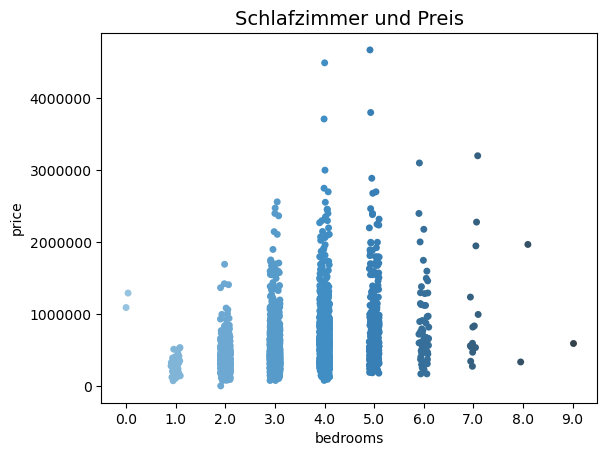

In [14]:
plt.figure(dpi=100)
plt.ticklabel_format(style = 'plain')
ax = sns.stripplot(x=df["bedrooms"], y=df["price"], palette="Blues_d")
ax.set_title('Schlafzimmer und Preis', fontsize=14)

In [15]:
df.groupby("bedrooms").agg({"price": ["min", "max", "count"]}).map(lambda x: f"{x:0.2f}")

price                     
                 min         max    count
bedrooms                                 
0.0       1095000.00  1295648.00     2.00
1.0         80000.00   540000.00    37.00
2.0          7800.00  1695000.00   561.00
3.0         83300.00  2560498.33  2023.00
4.0         84350.00  4489000.00  1512.00
5.0        185000.00  4668000.00   337.00
6.0        175000.00  3100000.00    59.00
7.0        280000.00  3200000.00    14.00
8.0        340000.00  1970000.00     2.00
9.0        599999.00   599999.00     1.00

Die Annahme wird bestätigt, dass Anzahl der Schlafzimmer größer 7 nur Outlier und starke Ausreißer sind. Es sind nur 2 Immobilien über diesen Grenzwert vorhanden. Diese können entfernt werden.

In [16]:
df = df[df["bedrooms"] <= 7]

Text(0.5, 1.0, 'Badezimmer und Preis')

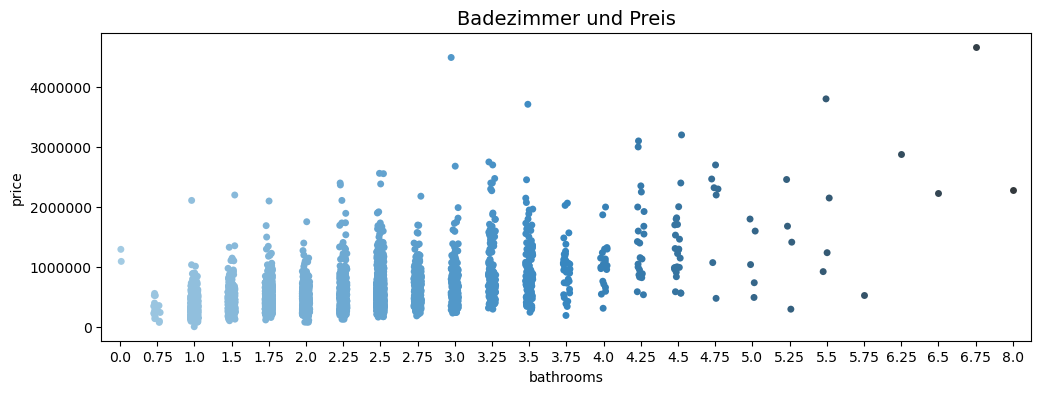

In [19]:
plt.figure(figsize=(12,4))
plt.ticklabel_format(style="plain")
ax = sns.stripplot(x=df["bathrooms"], y=df["price"], palette="Blues_d")
ax.set_title("Badezimmer und Preis", fontsize=14)

Für Immobilien mit 1,25 Badezimmern werden nur drei Immobilien angegeben. Verglichen mit den Immobilien mit einem Badezimmer, ist erkennbar, dass diese sich mitten im Intervall davon befinden. Daher wird der Wert 1,25 des Attributs Badezimmer mit 1 ersetzt. Darüber hinaus werden die drei Immobilien mit Badezimmer größer 4.5 entfernt.

In [20]:
df["bathrooms"] = np.where((df["bathrooms"] == 1.25), 1, df["bathrooms"])
df = df[df["bathrooms"] < 4.75]

Text(0.5, 1.0, 'Flur und Preis')

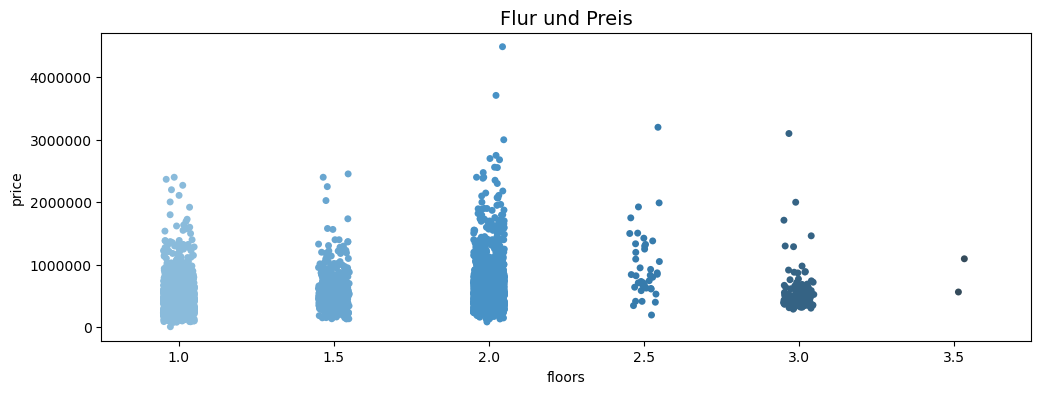

In [21]:
plt.figure(figsize=(12,4))
plt.ticklabel_format(style="plain")
ax = sns.stripplot(x=df["floors"], y=df["price"], palette="Blues_d")
ax.set_title("Flur und Preis", fontsize=14)

In [27]:
floor = df.groupby("floors").agg({"price": ["count", "min", "max"]}).map(lambda x: f"{x:0.2f}")
floor

price                       
          count        min         max
floors                                
1.0     2144.00    7800.00  2400000.00
1.5      439.00  132500.00  2453500.00
2.0     1769.00   84350.00  4489000.00
2.5       40.00  195000.00  3200000.00
3.0      128.00  288790.00  3100000.00

In dem Datensatz gibt es nur 1 Immobilie, die 3.5 Flure haben. Diese können daher zur Datenbereinigung mit 3 Fluren ersetzt werden.

In [26]:
df["floors"] = np.where((df["floors"] == 3.5), 3, df["floors"])

# 5 Data cleaning

In [30]:
straßenZahl = df["street"].nunique()
landZahl = df["country"].nunique()
stadtZahl = df["city"].nunique()
zipZahl = df["statezip"].nunique()
dateZahl = df["date"].nunique()

print("Anzahl Straßen: ", straßenZahl)
print("Anzahl Länder: ", landZahl)
print("Anzahl Städte: ", stadtZahl)
print("Anzahl Statezips: ", zipZahl)
print("Anzahl Datumsangaben: ", dateZahl)

Anzahl Straßen:  4446
Anzahl Länder:  1
Anzahl Städte:  44
Anzahl Statezips:  77
Anzahl Datumsangaben:  70


## Dummy encoding for condition and statezip

Statezip wird nicht als numerischer Wert sondern als Objekt gespeichert. So kann das lineare Regressionsmodell dieses Attribut nicht verwenden.

Um dieses Problem zu lösen, muss dieses Attribut encodet werden. Mithilfe von einem sogenannten One-Hot-Encoder wird das Attribut "Statezip" aufgesplittet - das heißt für jedes Statezip wird ein neues Attribut erzeugt und falls eine Immobilie in diesem Statezip ist, wird der Wert auf 1 ansonsten auf 0 gesetzt.

In [32]:
df_drop = df.copy()
drop_columns = ['date', 'country', 'street', 'city', 'yr_renovated']
df_drop.drop(drop_columns, axis=1, inplace=True)
df_corr = df_drop.copy()
df_drop = pd.get_dummies(df, columns=["statezip"], prefix=["statezip"])
df_drop = pd.get_dummies(df, columns=["condition"], prefix=["condition"])
df_drop.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,...,yr_renovated,street,city,statezip,country,condition_1,condition_2,condition_3,condition_4,condition_5
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,1340,...,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,False,False,True,False,False
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,3370,...,0,709 W Blaine St,Seattle,WA 98119,USA,False,False,False,False,True
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,1930,...,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,False,False,False,True,False
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,1000,...,0,857 170th Pl NE,Bellevue,WA 98008,USA,False,False,False,True,False
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,1140,...,1992,9105 170th Ave NE,Redmond,WA 98052,USA,False,False,False,True,False
